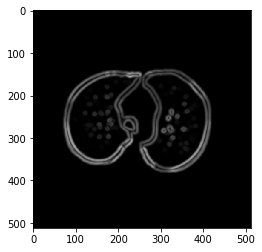

In [22]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('032.png')
blur = cv2.GaussianBlur(img, (7, 7), 2)
# plt.imshow(blur)
h, w = img.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
# plt.imshow(gradient)
# cv2.waitKey()
plt.imshow(gradient)

In [14]:
lowerb = np.array([0, 0, 0])
upperb = np.array([15, 15, 15])
binary = cv2.inRange(gradient, lowerb, upperb)
plt.imshow(binary)


error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:1742: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'inRange'


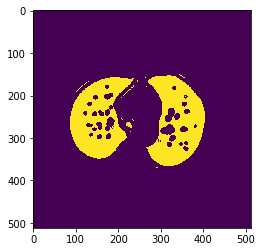

In [15]:
for row in range(h):
    if binary[row, 0] == 255:
        cv2.floodFill(binary, None, (0, row), 0)
    if binary[row, w-1] == 255:
        cv2.floodFill(binary, None, (w-1, row), 0)

for col in range(w):
    if binary[0, col] == 255:
        cv2.floodFill(binary, None, (col, 0), 0)
    if binary[h-1, col] == 255:
        cv2.floodFill(binary, None, (col, h-1), 0)

plt.imshow(binary)

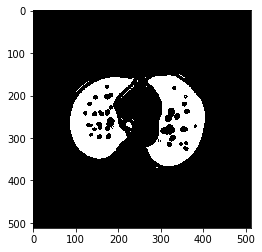

In [16]:
arr = np.asarray(binary)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

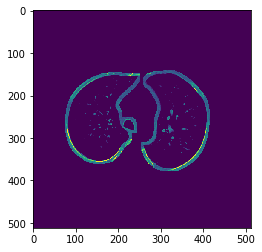

In [17]:
plt.imshow(img)

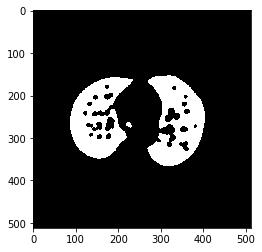

In [18]:
foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)
plt.imshow(foreground, cmap='gray', vmin=0, vmax=255)